In [10]:
import pandas as pd
import re
import matplotlib.pyplot as plt

def read_force_file(filename):
    # Read the file and skip the first four rows (header)
    df = pd.read_csv(filename, skiprows=4, delim_whitespace=True, header=None)
    
    # Clean the data by removing parentheses and converting to numeric
    df = df.applymap(lambda x: re.sub(r'[()]', '', str(x)))  # Remove parentheses
    df = df.apply(pd.to_numeric, errors='coerce')  # Convert to numeric, setting errors as NaN
    df = df.dropna(axis=1, how='all')  # Drop columns that are completely NaN
    df = df.dropna()  # Drop rows that have NaN
    
    return df

# Usage example:
filename = 'postProcessing/FR-all/0/force.dat'
filenamem = 'postProcessing/FR-all/0/moment.dat'

df_t = read_force_file(filename)
df_m = read_force_file(filenamem)

#print(df_t)

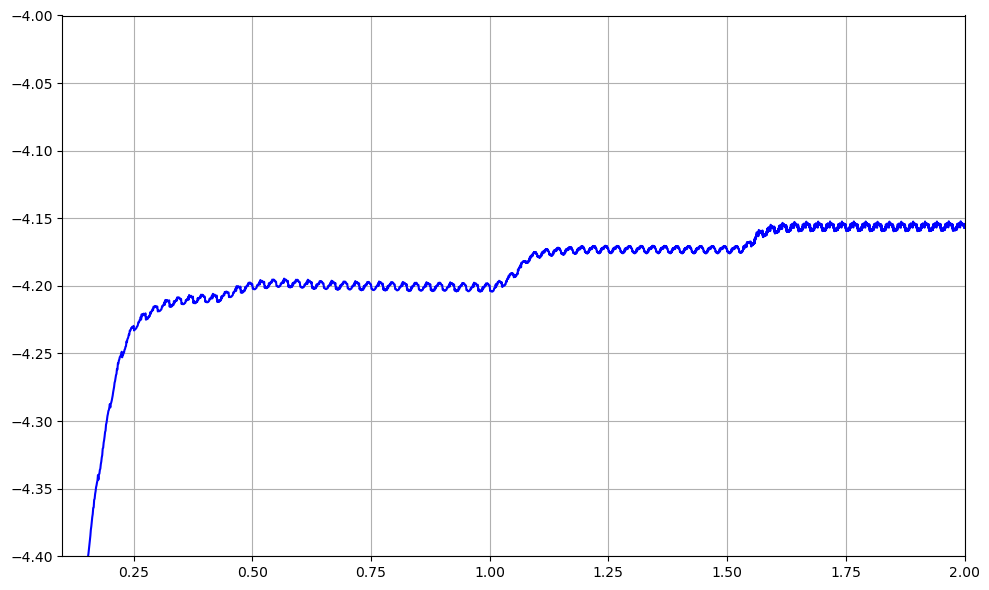

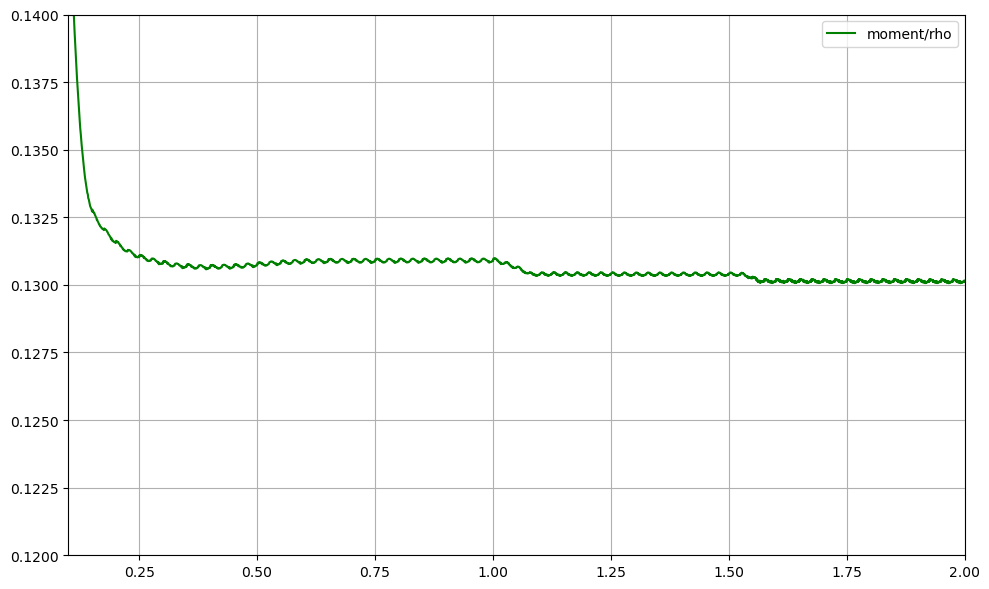

In [11]:
# Assuming the first column is the x-axis and the second column is the y-axis
x = df_t.iloc[:, 0]  # Select the first column
y = df_t.iloc[:, 1]  # Select the second column
xm = df_m.iloc[:, 0]  # Select the first column
ym = df_m.iloc[:, 1]  # Select the second column

# Plot the data
plt.figure(figsize=(10, 6))

plt.plot(x, y, label='thrust/rho', color='blue')

# Set axis labels with LaTeX math font
#plt.xlabel(r'$\text{Column 1}$')
#plt.ylabel(r'$\text{Column 2}$')
#plt.title(r'$\text{Column 1}$ vs $\text{Column 2}$')
plt.grid(True)
# Adjust x-axis range
plt.xlim(0.1, 2)
plt.ylim(-4.4, -4)

# Adjust layout to ensure labels are not cut off
plt.tight_layout()

# Save the figure to a file with bbox_inches='tight' to ensure everything fits
plt.savefig('thrust.png', bbox_inches='tight')

# Show the plot
plt.show()

# Plot the first two columns of dt_m
plt.figure(figsize=(10, 6))
plt.plot(xm, ym, label='moment/rho', color='green')
#plt.xlabel(r'$\text{Column 1}$')
#plt.ylabel(r'$\text{Column 2}$')
#plt.title(r'$\text{dt\_m\ Column\ 1\ vs\ Column\ 2}$')
plt.legend()
plt.grid(True)
plt.xlim(0.1, 2)
plt.ylim(0.12, 0.14)
plt.tight_layout()
plt.savefig('moment.png', bbox_inches='tight')
plt.show()


In [12]:
# Rename the first column to 'time' for dt_t
df_t.rename(columns={df_t.columns[0]: 'Time'}, inplace=True)

# Rename the first column to 'time' for dt_m
df_m.rename(columns={df_m.columns[0]: 'Time'}, inplace=True)

# Print the DataFrames to verify the renaming
#print(df_t.head())
#print(df_m.head())

In [13]:
# Specify the time range
start_time = 1.7
end_time = 2.0

# Filter the DataFrame based on the time range
filtered_df_t = df_t[(df_t['Time'] >= start_time) & (df_t['Time'] <= end_time)]
filtered_df_m = df_m[(df_m['Time'] >= start_time) & (df_m['Time'] <= end_time)]

# Calculate the average of the first column within the filtered range
average_columnt = filtered_df_t.iloc[:, 1].mean()  # Assuming the first column is time, so the average is taken on the second column
average_columnm = filtered_df_m.iloc[:, 1].mean()  # Assuming the first column is time, so the average is taken on the second column
std_t = filtered_df_t.iloc[:, 1].std()
std_m = filtered_df_m.iloc[:, 1].std()          
print(f"The average thrust over the time range {start_time} to {end_time} is {average_columnt:.6g}")
print(f"The average moment over the time range {start_time} to {end_time} is {average_columnm:.6g}")
print(f"The std thrust over the time range {start_time} to {end_time} is {std_t:.6g}")
print(f"The std moment over the time range {start_time} to {end_time} is {std_m:.6g}")

The average thrust over the time range 1.7 to 2.0 is -4.15621
The average moment over the time range 1.7 to 2.0 is 0.130136
The std thrust over the time range 1.7 to 2.0 is 0.00175995
The std moment over the time range 1.7 to 2.0 is 3.66849e-05


In [2]:
dia = 0.1066 # m
Va  = 1.0    # m/s
n   = 10     # rps
rho = 1000
kt = -1*average_columnt/(rho*n**2*dia**4)
kq = average_columnm/(rho*n**2*dia**5)

kt_std = std_t/(rho*n**2*dia**4)
kq_std = std_m/(rho*n**2*dia**5)

print(kt, kq)
print(kt_std, kq_std)

NameError: name 'average_columnt' is not defined

In [4]:
# Import math Library
import math

# Print the value of pi
print (math.pi)

J = Va/(n*dia)
eta_o = kt/kq*J/(2*math.pi)

print(J, eta_o)

3.141592653589793


NameError: name 'kt' is not defined

In [15]:
data = {
    "start_time": [start_time],
    "end_time": [end_time],
    "kt": [kt],
    "kq": [kq],
    "kt_std": [kt_std],
    "kq_std": [kq_std],
    "dia": [dia],
    "n": [n],
    "Va": [Va],
    "rho": [rho],
    "J": [J],
    "eta_o": [eta_o]
}

In [17]:
df_o = pd.DataFrame(data)


In [18]:
df_o.to_csv('output.csv', index=False)


3.141592653589793
0.9380863039399624 0.5083012528782235
